In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import minmax_scale

In [2]:
results_M75LD = pd.read_csv('C:/Users/carlo/OneDrive/Github/DS-Moura/Estudo Engenharia de Processos/kmeans_model_M75LD_nd.csv')
results_M100HE = pd.read_csv('C:/Users/carlo/OneDrive/Github/DS-Moura/Estudo Engenharia de Processos/kmeans_model_M100HE_nd.csv')
results_M75LD = results_M75LD.drop(columns='Unnamed: 0')
results_M100HE = results_M100HE.drop(columns='Unnamed: 0')

In [3]:
results1=results_M75LD
results2=results_M100HE

In [4]:
#results 1

def line_to_column(df,name):
    new_list = []
    
    for cols_c, val_sc in df.T.items():
        for row in range(61):
            new_list.append([name,df.Cluster[cols_c],50*row,
                             val_sc['tensao_'+str(50*row)],
                             val_sc['corrente_'+str(50*row)]])
    df_full = pd.DataFrame(new_list)
    df_full = df_full.rename(columns={0:'item',1:'Cluster',2:'sequencia',3:'tensao',4:'corrente'})
    return df_full

In [5]:
clust_results_M75LD = line_to_column(results1,'M75LD')

In [6]:
clust_results_M75LD

,item,Cluster,sequencia,tensao,corrente
0,M75LD,Cluster 0,0,12.803011,-0.000053
1,M75LD,Cluster 0,50,12.803011,-0.000053
2,M75LD,Cluster 0,100,12.803011,-0.000053
3,M75LD,Cluster 0,150,12.802444,-0.000053
4,M75LD,Cluster 0,200,12.801879,-0.000053
...,...,...,...,...,...
1902646,M75LD,Cluster 2,2800,7.958659,696.807200
1902647,M75LD,Cluster 2,2850,7.957527,696.968140
1902648,M75LD,Cluster 2,2900,7.950736,696.968140
1902649,M75LD,Cluster 2,2950,7.947340,697.048650


In [7]:
from sklearn.preprocessing import minmax_scale

clust_results_M75LD['NormV'] = minmax_scale(clust_results_M75LD['tensao'],axis=0)
clust_results_M75LD['NormC'] = minmax_scale(clust_results_M75LD['corrente'],axis=0)
clust_results_M75LD['%_Vi'] = clust_results_M75LD['tensao']/clust_results_M75LD['tensao'].max()

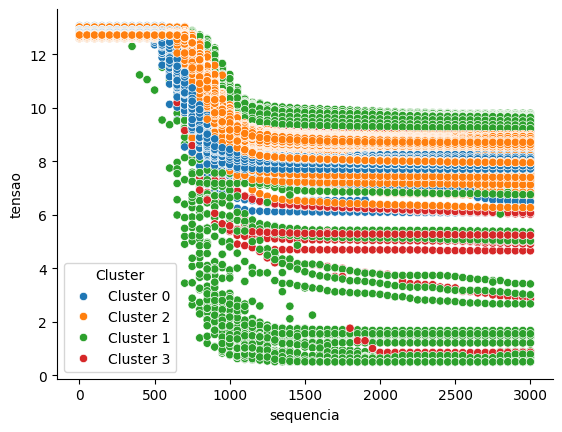

In [8]:
# @title Testing Time vs Voltage
sns.scatterplot(clust_results_M75LD, x='sequencia', y='tensao', hue='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

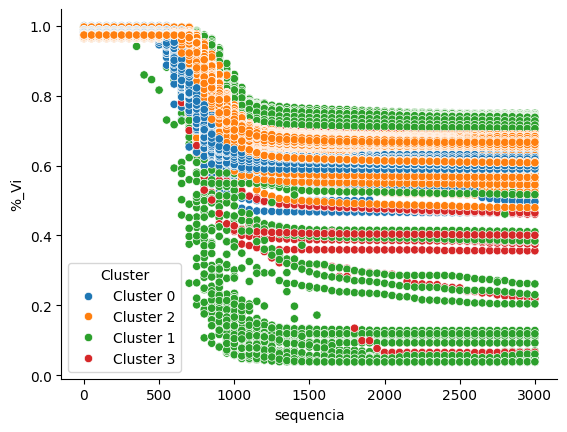

In [9]:
sns.scatterplot(clust_results_M75LD, x='sequencia', y='%_Vi', hue='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

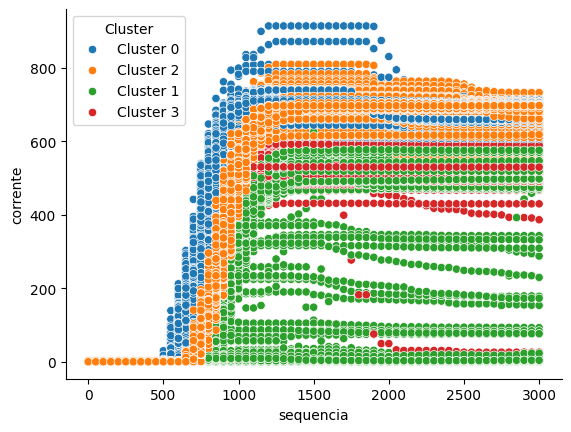

In [10]:
sns.scatterplot(clust_results_M75LD, x='sequencia', y='corrente', hue='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='tensao', ylabel='Count'>

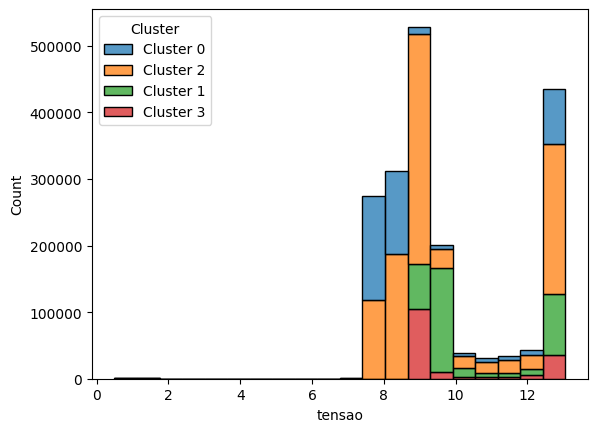

In [11]:
#Check distribution of voltage values by cluster
sns.histplot(clust_results_M75LD, x='tensao', hue='Cluster',bins=20,multiple="stack")

<Axes: xlabel='tensao', ylabel='Count'>

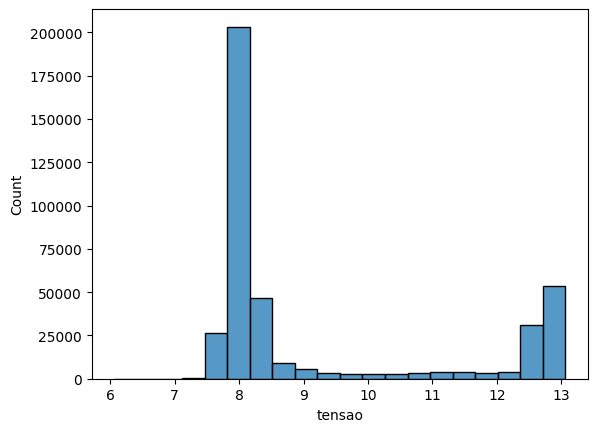

In [12]:
sns.histplot(clust_results_M75LD[ clust_results_M75LD['Cluster']=='Cluster 0' ], x='tensao',bins=20)

<Axes: xlabel='tensao', ylabel='Count'>

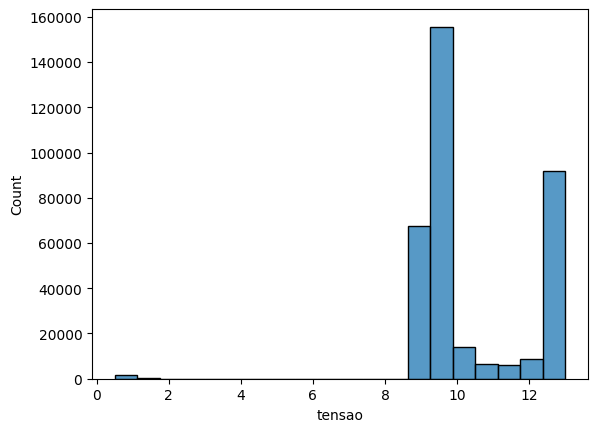

In [13]:
sns.histplot(clust_results_M75LD[ clust_results_M75LD['Cluster']=='Cluster 1' ], x='tensao',bins=20)

<Axes: xlabel='tensao', ylabel='Count'>

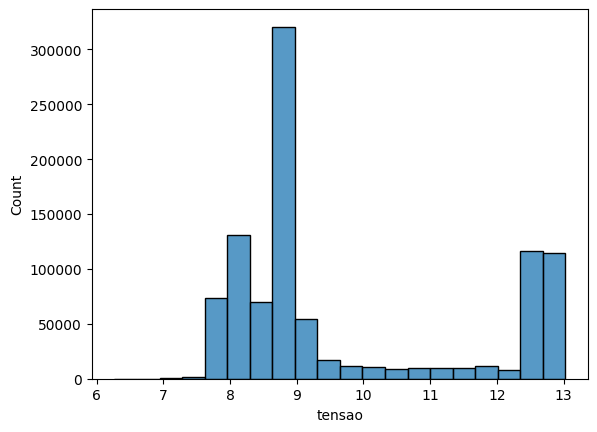

In [14]:
sns.histplot(clust_results_M75LD[ clust_results_M75LD['Cluster']=='Cluster 2' ], x='tensao',bins=20)

<Axes: xlabel='tensao', ylabel='Count'>

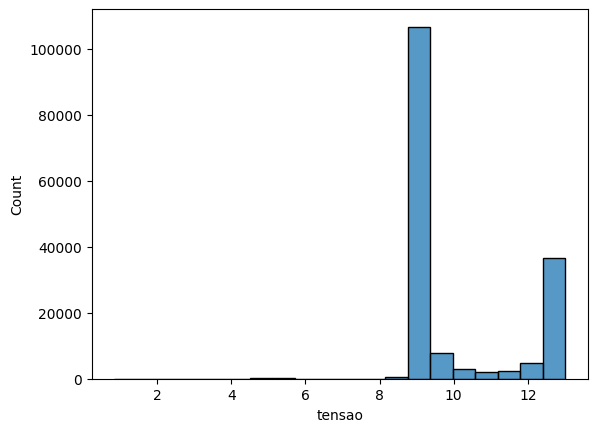

In [15]:
sns.histplot(clust_results_M75LD[ clust_results_M75LD['Cluster']=='Cluster 3' ], x='tensao',bins=20)

In [16]:
#Another type of battery
clust_results_M100HE = line_to_column(results2,'M100HE')

In [17]:
from sklearn.preprocessing import minmax_scale

clust_results_M100HE['NormV'] = minmax_scale(clust_results_M100HE['tensao'],axis=0)
clust_results_M100HE['NormC'] = minmax_scale(clust_results_M100HE['corrente'],axis=0)
clust_results_M100HE['%_Vi'] = clust_results_M100HE['tensao']/clust_results_M100HE['tensao'].max()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


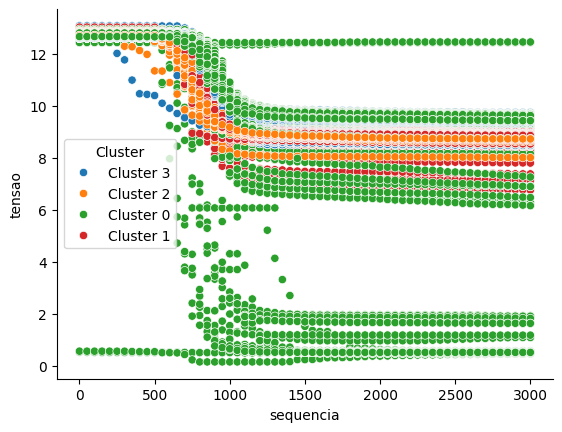

In [18]:
# @title Testing Time vs Voltage
sns.scatterplot(clust_results_M100HE, x='sequencia', y='tensao', hue='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='tensao', ylabel='Count'>

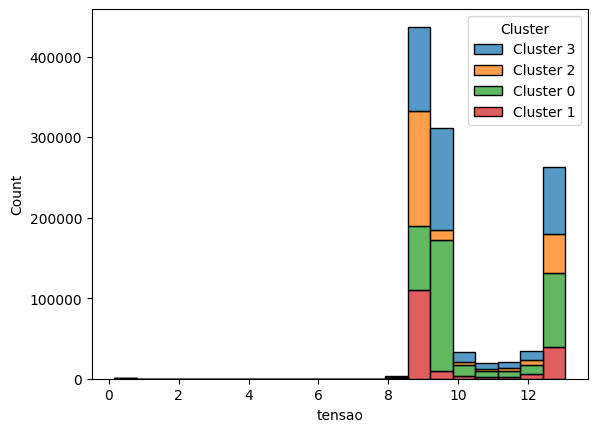

In [19]:
#Check distribution of voltage values by cluster
sns.histplot(clust_results_M100HE, x='tensao', hue='Cluster',bins=20,multiple="stack")

<Axes: xlabel='tensao', ylabel='Count'>

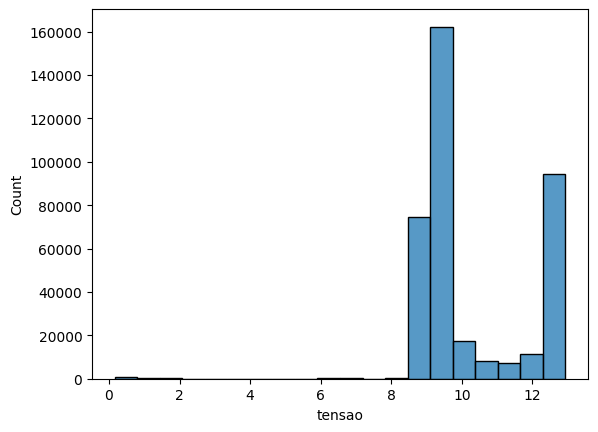

In [20]:
sns.histplot(clust_results_M100HE[ clust_results_M100HE['Cluster']=='Cluster 0' ], x='tensao',bins=20)

<Axes: xlabel='tensao', ylabel='Count'>

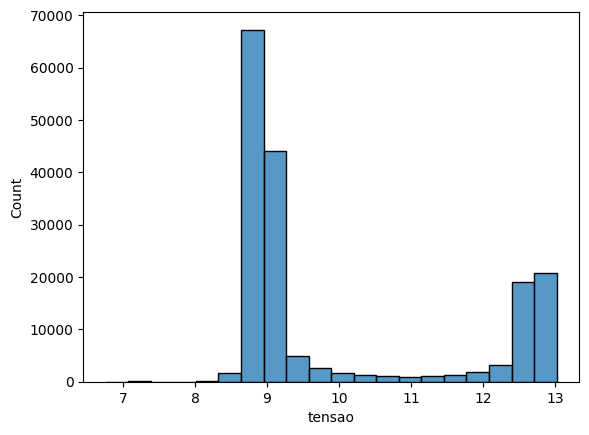

In [21]:
sns.histplot(clust_results_M100HE[ clust_results_M100HE['Cluster']=='Cluster 1' ], x='tensao',bins=20)

<Axes: xlabel='tensao', ylabel='Count'>

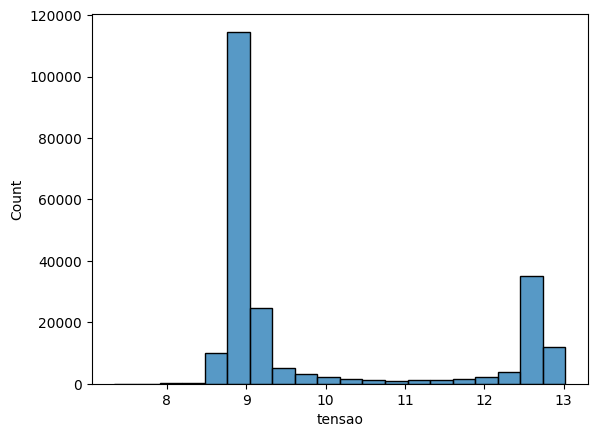

In [22]:
sns.histplot(clust_results_M100HE[ clust_results_M100HE['Cluster']=='Cluster 2' ], x='tensao',bins=20)

<Axes: xlabel='tensao', ylabel='Count'>

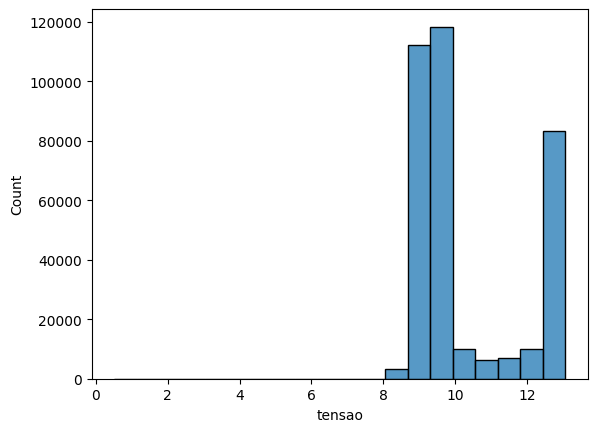

In [23]:
sns.histplot(clust_results_M100HE[ clust_results_M100HE['Cluster']=='Cluster 3' ], x='tensao',bins=20)